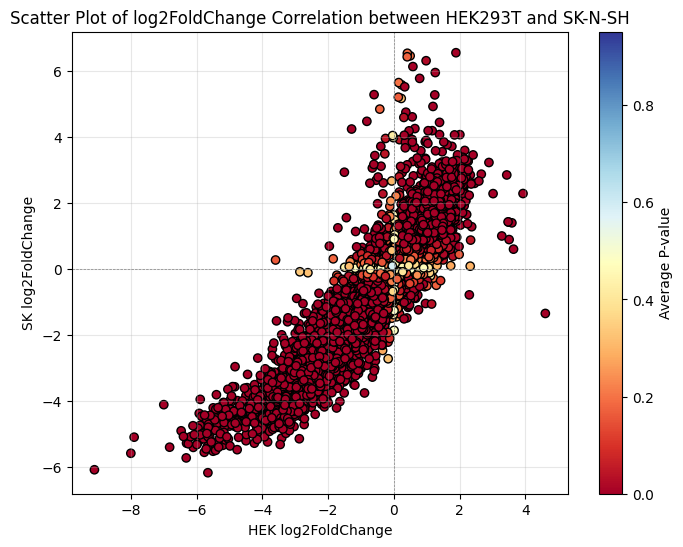

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# use Deseq normalized data (baseMean is normalized DNA counts)
deg_hek = pd.read_csv('/home/yg2895/media/protein/yg2895/ASO-lib-20250102/DE_analyse/filerted_hek_df100.csv')
deg_sk = pd.read_csv('/home/yg2895/media/protein/yg2895/ASO-lib-20250102/DE_analyse/filerted_sk_df100.csv')

merged_df = pd.merge(deg_hek, deg_sk, on='Name',suffixes=('_hek', '_sk'))
# print(len(merged_df))

# Scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    merged_df['log2FoldChange_hek'], 
    merged_df['log2FoldChange_sk'], 
    c=merged_df[['padj_hek', 'padj_sk']].mean(axis=1), 
    cmap='RdYlBu', 
    edgecolor='k'
)
plt.colorbar(scatter, label='Average P-value')
plt.xlabel('HEK log2FoldChange')
plt.ylabel('SK log2FoldChange')
plt.title('Scatter Plot of log2FoldChange Correlation between HEK293T and SK-N-SH')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(alpha=0.3)
plt.show()

In [4]:
corr = merged_df['log2FoldChange_hek'].corr(merged_df['log2FoldChange_sk'], 'pearson')
print(corr)

0.9032973220354912


# use orignal counts

In [30]:
import pandas as pd
import numpy as np

df = pd.read_csv('oligo_ratio.csv')
print(len(df))

12000


In [38]:
import pandas as pd
import numpy as np
from scipy import stats as st

# Replace positive and negative inf with nan in the DataFrame
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Drop rows with any 'NaN' values
df.dropna(inplace=True)

# Display the resulting DataFrame
print(len(df))

11722


In [39]:
# Extract the 'hek_rd' column
data = df['hek_rd']

# Calculate the 95% confidence interval for the 'hek_rd' column
confid_int = stats.norm.interval(0.99, loc=np.mean(data), scale=stats.sem(data))

# Filter the DataFrame to include only the data within the 95% confidence interval
df1 = df.loc[(data <= confid_int[1])]


NameError: name 'stats' is not defined

In [36]:
# Extract the 'hek_rd' column
data = df1['sk_rd']

# Calculate the 95% confidence interval for the 'hek_rd' column
confid_int = stats.norm.interval(0.99, loc=np.mean(data), scale=stats.sem(data))

# Filter the DataFrame to include only the data within the 95% confidence interval
df2 = df1.loc[(data <= confid_int[1])]

print(len(df2))

NameError: name 'df1' is not defined

0.8146316782246942


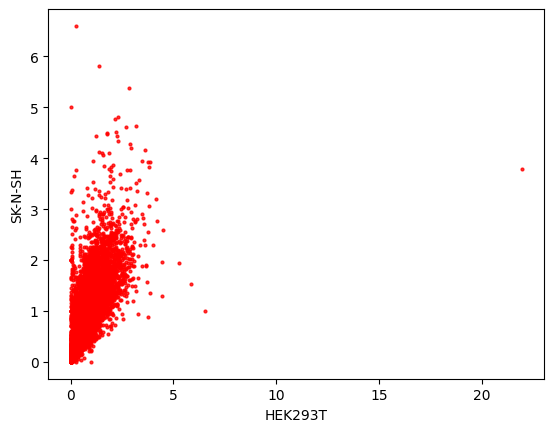

In [41]:
# compare correlation after remove >95% CI
cor = df['hek_rd'].corr(df['sk_rd'], 'spearman')
print(cor)
# draw scatter plot
plt.scatter(df['hek_rd'], df['sk_rd'], alpha=0.8,s=4,color='red')
plt.xlabel('HEK293T')
plt.ylabel('SK-N-SH')
plt.show()

0.8146316782246942


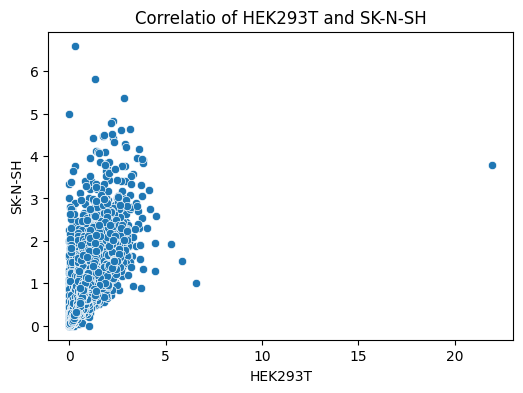

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

cor = df['hek_rd'].corr(df['sk_rd'], 'spearman')
print(cor)

# Draw the scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='hek_rd', y='sk_rd', data=df.iloc[:,[1,2]])

# Additional plot settings
plt.title('Correlatio of HEK293T and SK-N-SH')
plt.xlabel('HEK293T')
plt.ylabel('SK-N-SH')

# Show the plot
plt.show()
